In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle

In [2]:
data = pd.read_csv("data/r76_80VNaI-trig.csv", skiprows=1, engine='python', \
                   names=['Row','Series Number', 'Event Number' , 'pt_keVee', 'zip4.PAWKmax','sihv_delay_us'],\
                   delim_whitespace=False)
print (data.head(10))

ptkeVee = np.asarray(data['pt_keVee'])
delay = np.asarray(data['sihv_delay_us'])

     Row  Series Number  Event Number  pt_keVee  zip4.PAWKmax  sihv_delay_us
0   2701    72208301829         30723  0.035725  8.000000e-07      16.693489
1  11297    72208301829        130836  0.038254  8.020000e-07       6.400297
2  30026    72208301829        350862  0.036184  7.940000e-07       8.980651
3  30916    72208301829        370001  0.049426  8.180000e-07      23.146283
4  37582    72208301829        440803  0.035576  7.950000e-07      13.011052
5  38539    72208301829        460069  0.045618  7.920000e-07      25.248736
6  39591    72208301829        470281  0.035067  8.050000e-07      20.661957
7  42318    72208301829        500505  0.041488  8.200000e-07      15.435329
8  45709    72208301829        540700  0.041441  7.930000e-07       3.237797
9  45912    72208301829        550152  0.965356  8.240000e-07       4.188241


In [3]:
ebins = np.linspace(0,1.0,80)
xcq = (ebins[:-1] + ebins[1:]) / 2

n,nx = np.histogram(ptkeVee[delay<30],bins=ebins)

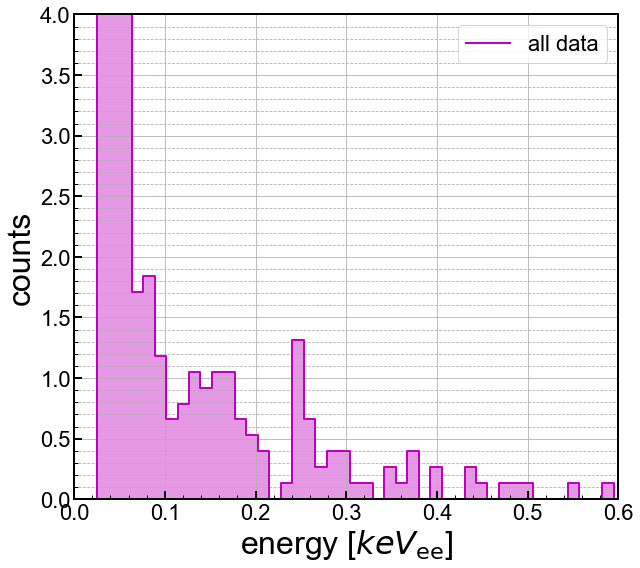

In [4]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


ehist = n/np.sum(n)/np.diff(xcq)[0]



#print(estring)
ax1.step(xcq,ehist, where='mid',color='m', linestyle='-', \
            label='all data', linewidth=2)


ymin = 0.0
ymax = 4

blue = '#118DFA'
ax1.fill_between(xcq,np.zeros(np.shape(xcq)),ehist,step='mid',facecolor='m',alpha=0.4, \
                 label='')




ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 0.6) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [$keV_{\mathrm{ee}}$]')
ax1.set_ylabel('counts')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/MSyieldHist_Figure3a.eps')
#plt.savefig('paper_figures/MSyieldHist_Figure3a.pdf')
plt.show()

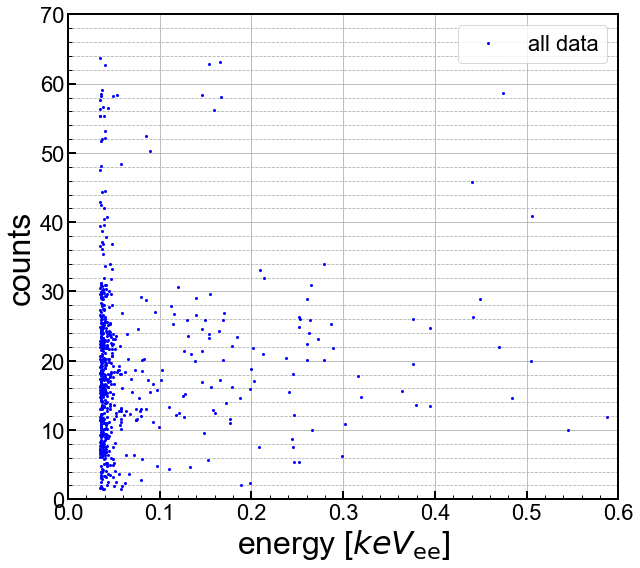

In [5]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


ehist = n/np.sum(n)/np.diff(xcq)[0]
#ax1.errorbar(xE,qbootsigs, yerr=(qbootsigerrsl,qbootsigerrsu), \
#         color='k', marker='o', markersize=4,linestyle='none',label='simulated NR scatters', linewidth=2)


#print(estring)
ax1.plot(ptkeVee,delay,color='blue', marker='o', markersize=2, \
            label='all data', linestyle='none',linewidth=2)


ymin = 0.0
ymax = 70





ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 0.6) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [$keV_{\mathrm{ee}}$]')
ax1.set_ylabel('counts')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/MSyieldHist_Figure3a.eps')
#plt.savefig('paper_figures/MSyieldHist_Figure3a.pdf')
plt.show()

In [6]:
tbins = np.linspace(0,70,140)
tcq = (tbins[:-1] + tbins[1:]) / 2

tn,tnx = np.histogram(delay[ptkeVee>0.03],bins=tbins)

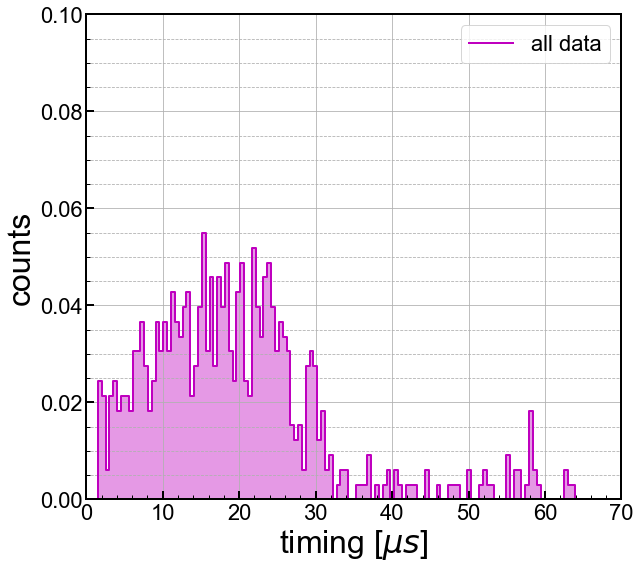

In [7]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


thist = tn/np.sum(tn)/np.diff(tcq)[0]



#print(estring)
ax1.step(tcq,thist, where='mid',color='m', linestyle='-', \
            label='all data', linewidth=2)


ymin = 0.0
ymax = 0.1

blue = '#118DFA'
ax1.fill_between(tcq,np.zeros(np.shape(tcq)),thist,step='mid',facecolor='m',alpha=0.4, \
                 label='')




ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 70) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'timing [$\mu s$]')
ax1.set_ylabel('counts')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/MSyieldHist_Figure3a.eps')
#plt.savefig('paper_figures/MSyieldHist_Figure3a.pdf')
plt.show()

In [8]:
ebins = np.linspace(0,1.0,80)
xcq = (ebins[:-1] + ebins[1:]) / 2

n,nx = np.histogram(ptkeVee[(delay>10.) & (delay<14.0)],bins=ebins)

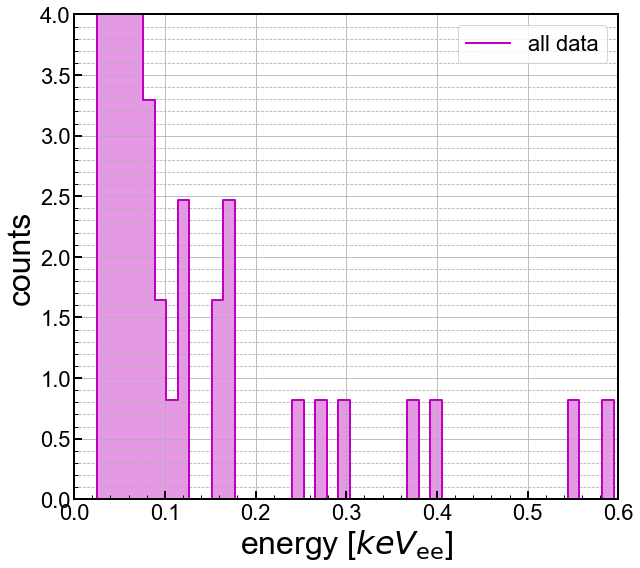

In [9]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


ehist = n/np.sum(n)/np.diff(xcq)[0]



#print(estring)
ax1.step(xcq,ehist, where='mid',color='m', linestyle='-', \
            label='all data', linewidth=2)


ymin = 0.0
ymax = 4

blue = '#118DFA'
ax1.fill_between(xcq,np.zeros(np.shape(xcq)),ehist,step='mid',facecolor='m',alpha=0.4, \
                 label='')




ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 0.6) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [$keV_{\mathrm{ee}}$]')
ax1.set_ylabel('counts')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/MSyieldHist_Figure3a.eps')
#plt.savefig('paper_figures/MSyieldHist_Figure3a.pdf')
plt.show()